# TRIP & TRAVEL CUSTOMER RECOMMENDATIONS MODEL

![App Platorm](https://holidayturn.com/wp-content/uploads/2017/09/International-travel.jpg)

## Problem Given:
"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

## Dataset Feature Descriptions:
* `CustomerID`               : Unique customer ID
* `ProdTaken`                : Whether or not the customer bought a product
* `Age`                      : Customer age
* `TypeofContact`            : How was the customer contacted
* `CityTier`                 : City tier depends on the development of a city, population, facilities, and living standards
* `DurationOfPitch`          : Duration of the pitch by a salesperson to the customer
* `Occupation`               : Occupation of customer
* `Gender`                   : Gender of customer
* `NumberOfPersonVisiting`   : Total number of persons planning to take the trip with the customer
* `NumberOfFollowups`        : Total number of follow-ups has been done by the salesperson after the sales pitch
* `ProductPitched`           : Product pitched by the salesperson
* `PreferredPropertyStar`    : Preferred hotel property rating by customer
* `MaritalStatus`            : Marital status of customer
* `NumberOfTrips`            : Average number of trips in a year by customer
* `Passport`                 : If customer has passport or not
* `PitchSatisfactionScore`   : Sales pitch satisfaction score
* `OwnCar`                   : Does the customer own a car
* `NumberOfChildrenVisiting` : Number of children traveling with the customer
* `Designation`              : Designation of the customer in the current organization
* `MonthlyIncome`            : Gross monthly income of the customer

In [52]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [53]:

url = 'https://raw.githubusercontent.com/sulthonamar/DataPreprocessing/main/Travel.csv'
df = pd.read_csv(url)

In [54]:
df.columns = df.columns.str.lower()
df.head()

,customerid,prodtaken,age,typeofcontact,citytier,durationofpitch,occupation,gender,numberofpersonvisiting,numberoffollowups,productpitched,preferredpropertystar,maritalstatus,numberoftrips,passport,pitchsatisfactionscore,owncar,numberofchildrenvisiting,designation,monthlyincome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [55]:
dnum_col = ['numberofpersonvisiting','numberoffollowups','numberoftrips','pitchsatisfactionscore','numberofchildrenvisiting']

#continuous numerical columns
cnum_col = ['age','durationofpitch','monthlyincome']

#list of categorical columns
ncat_col = ['customerid','occupation','gender','typeofcontact', 'maritalstatus','passport','owncar']

ocat_col = ['productpitched','citytier','preferredpropertystar','designation']

#target column
target_col = ['prodtaken']

In [56]:
numericals = dnum_col + cnum_col
categoricals = ncat_col + ocat_col

**Deskripsi data**
- Terdapat 19 parameter yang sekaligus menjadi variabel independet dan 1 variabel target pada data
- variabel target berada pada kolom `prodtaken` dengan tipe data numerik dan hanya memiliki 2 nilai, 1 untuk pelanggan yang mengambil paket yang ditawarkan dan 0 untuk pelanggan yang tidak mengambil paket yang ditawarkan
- Untuk memudahkan proses analisis pada data, kami membagi 19 parameter atau variabel independent ini ke dalam 4 kelompok berdasarkan tipe datanya yaitu:
  - Numerik-Diskrit : `numberofpersonvisiting`,`numberoffollowups`,`numberoftrips`,`pitchsatisfactionscore`,`numberofchildrenvisiting`
  - Numerik-Continouse: `age`,`durationofpitch`,`monthlyincome`
  - Kategorik-Nominal: `customerid`,`occupation`,`gender`,`typeofcontact`, `maritalstatus`,`passport`,`owncar`
  - Kategorik-Ordinal: `productpitched`,`citytier`,`preferredpropertystar`,`designation`

# 1. Statistika Deskriptif

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerid                4888 non-null   int64  
 1   prodtaken                 4888 non-null   int64  
 2   age                       4662 non-null   float64
 3   typeofcontact             4863 non-null   object 
 4   citytier                  4888 non-null   int64  
 5   durationofpitch           4637 non-null   float64
 6   occupation                4888 non-null   object 
 7   gender                    4888 non-null   object 
 8   numberofpersonvisiting    4888 non-null   int64  
 9   numberoffollowups         4843 non-null   float64
 10  productpitched            4888 non-null   object 
 11  preferredpropertystar     4862 non-null   float64
 12  maritalstatus             4888 non-null   object 
 13  numberoftrips             4748 non-null   float64
 14  passport

Dari fungsi `.info()` diketahui:
- Terdapat 20 Fitur atau kolom dengan 4888 baris data dengan 19 variabel independent dan 1 variabel dependen atau target (`prodtaken)`
- Beberapa fitur memiliki ***Missing Value*** diantaranya: `Age`, `TypeofContact`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`, dan `MonthlyIncome`
- Tipe data yang digunakan pada dataset ini terdiri dari : `float64(7)`, `int64(7)`, `object(6)`
- Dilihat dari tipe data masing-masing fitur, semua tipe data yang digunakan sudah merepresentasikan isi dari fitur tersebut - semua fitur yang ingin dianalisis secara mendalam melalui pendekatan grafis bisa diinterpretasikan dengan tipe data yang ada sekarang

### **Deskripsi Fitur pada Dataset**

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
prodtaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
citytier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
durationofpitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
numberofpersonvisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
numberoffollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
preferredpropertystar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
numberoftrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


### Deskripsi Fitur Numerik

In [59]:
df[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
numberofpersonvisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
numberoffollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
numberoftrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
pitchsatisfactionscore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0
numberofchildrenvisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
durationofpitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
monthlyincome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


### Deskripsi Fitur Kategorik

In [60]:
df[categoricals].astype('str').describe().T

,count,unique,top,freq
customerid,4888,4888,200000,1
occupation,4888,4,Salaried,2368
gender,4888,3,Male,2916
typeofcontact,4888,3,Self Enquiry,3444
maritalstatus,4888,4,Married,2340
passport,4888,2,0,3466
owncar,4888,2,1,3032
productpitched,4888,5,Basic,1842
citytier,4888,3,1,3190
preferredpropertystar,4888,4,3.0,2993


In [61]:
for i in df[categoricals].columns:
    x = df[i].unique()
    print(f'{i}: {x}')
    print()

customerid: [200000 200001 200002 ... 204885 204886 204887]

occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

gender: ['Female' 'Male' 'Fe Male']

typeofcontact: ['Self Enquiry' 'Company Invited' nan]

maritalstatus: ['Single' 'Divorced' 'Married' 'Unmarried']

passport: [1 0]

owncar: [1 0]

productpitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

citytier: [3 1 2]

preferredpropertystar: [ 3.  4.  5. nan]

designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



**Fitur Numerik**
- Dilihat dari nilai standar devisasi, fitur `age` dan `durationofpitch` memiliki nilai yang cukup tinggi. Hal ini bisa menjadi indikasi kedua fitur memiliki pengaruh yang kuat pada dataset untuk variabel dependent, sehingga dibutuhkan analisis lebih lanjut terkait hubungan kedua fitur ini dengan fitur target.
- Dilihat dari nilai mean dan median, semua fitur numerik kecuali variabel `numberofperseonvisiting`, `numberoffollowups` dan `pitchsatisfactionscore` memiliki nilai **mean** yang **lebih tinggi** dibandingkan dengan nilai **median**, hal ini mengindikasikan data lebih condong ke kanan atau ***Positif Skewed*** - temuan ini bisa dianalisis lebih lanjut untuk melihat apakah ada nilai outlier dari masing-masing fitur dan pada pre proses data hal ini bisa dijadikan acuan untuk melakukan handling outlier dan transformasi data
- Untuk fitur `numberofperseonvisiting`, `numberoffollowups` terlihat bahwa **mean** memiliki nilai yang **lebih kecil** dibandingkan dengan **median** sehingga bisa menjadi indikasi data berdistribusi tidak normal tepatnya ***Negative Skewed***
- Untuk fitur  `pitchsatisfactionscore` terlihat bahwa nilai mean dan median hampir sama sehingga bisa dikatakan distribusi data pada fitur ini mendekati normal.

**Fitur Kategorik**
- Fitur `CustomerID` merupakan fitur **identifier** pada dataset sehingga semua nilainya ***unique***, dan bisa dipertimbangkan untuk ***Drop*** pada tahap preproses data
- Tidak perlu ada fitur lain yang dibuang atau didrop untuk fitur kategorik, karena nilai unik dari masing-masing kolom masih dalam batas wajar
- Dilihat dari nilai unique masing-masing fitur terdapat beberapa nilai yang janggal, diantaranya:

  - Fitur `Gender` memiliki nilai `['Female' 'Male' 'Fe Male']` sehingga nilai `Fe Male` dapat dikonversi menjadi `Female`
  - Fitur `MaritalStatus` memiliki nilai `['Single' 'Divorced' 'Married' 'Unmarried']` dimana `Unmarried` sama artinya dengan `Single`, sehingga bisa dikonversi ke salah satu nilai saja

# 2. Univariate Analysis

## 2.1 Univariate Analysis for Numerical & Categoricals

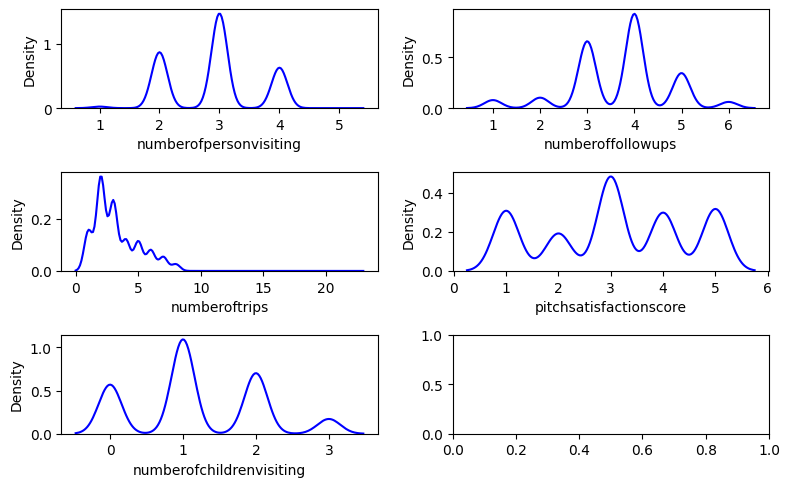

In [62]:
# Membuat subplots
fig, axes = plt.subplots(3, 2, figsize=(8, 5))  # Mengubah ukuran figure

# Plot setiap fitur pada subplot yang sesuai
for i, feature in enumerate(dnum_col):
    sns.kdeplot(x=df[feature], ax=axes[i//2, i%2], color='blue')
    axes[i//2, i%2].set_xlabel(feature)
    axes[i//2, i%2].set_ylabel('Density')

plt.tight_layout()
plt.show()

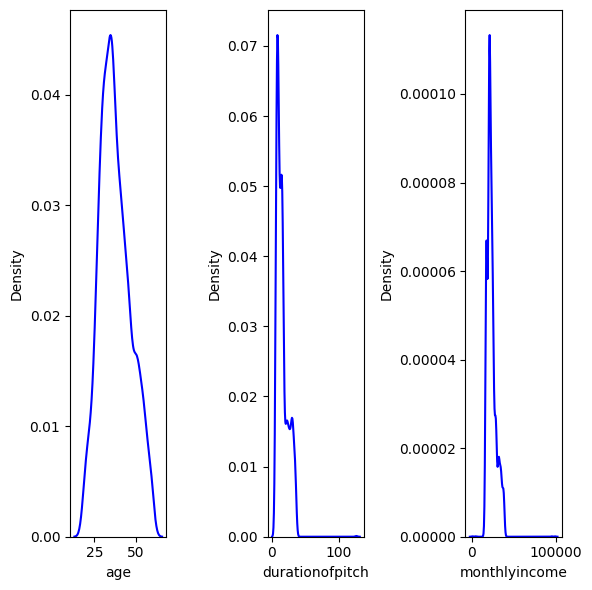

In [63]:
# Membuat subplots
fig, axes = plt.subplots(1, 3, figsize=(6, 6))  # Mengubah ukuran figure

# Plot setiap fitur pada subplot yang sesuai
for i, feature in enumerate(cnum_col):
    sns.kdeplot(x=df[feature], ax=axes[i], color='blue')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [64]:
cols_categorical = ['prodtaken','numberoffollowups','typeofcontact','citytier','occupation','gender','numberofpersonvisiting','productpitched','preferredpropertystar','maritalstatus','passport','pitchsatisfactionscore','owncar','designation','numberofchildrenvisiting']

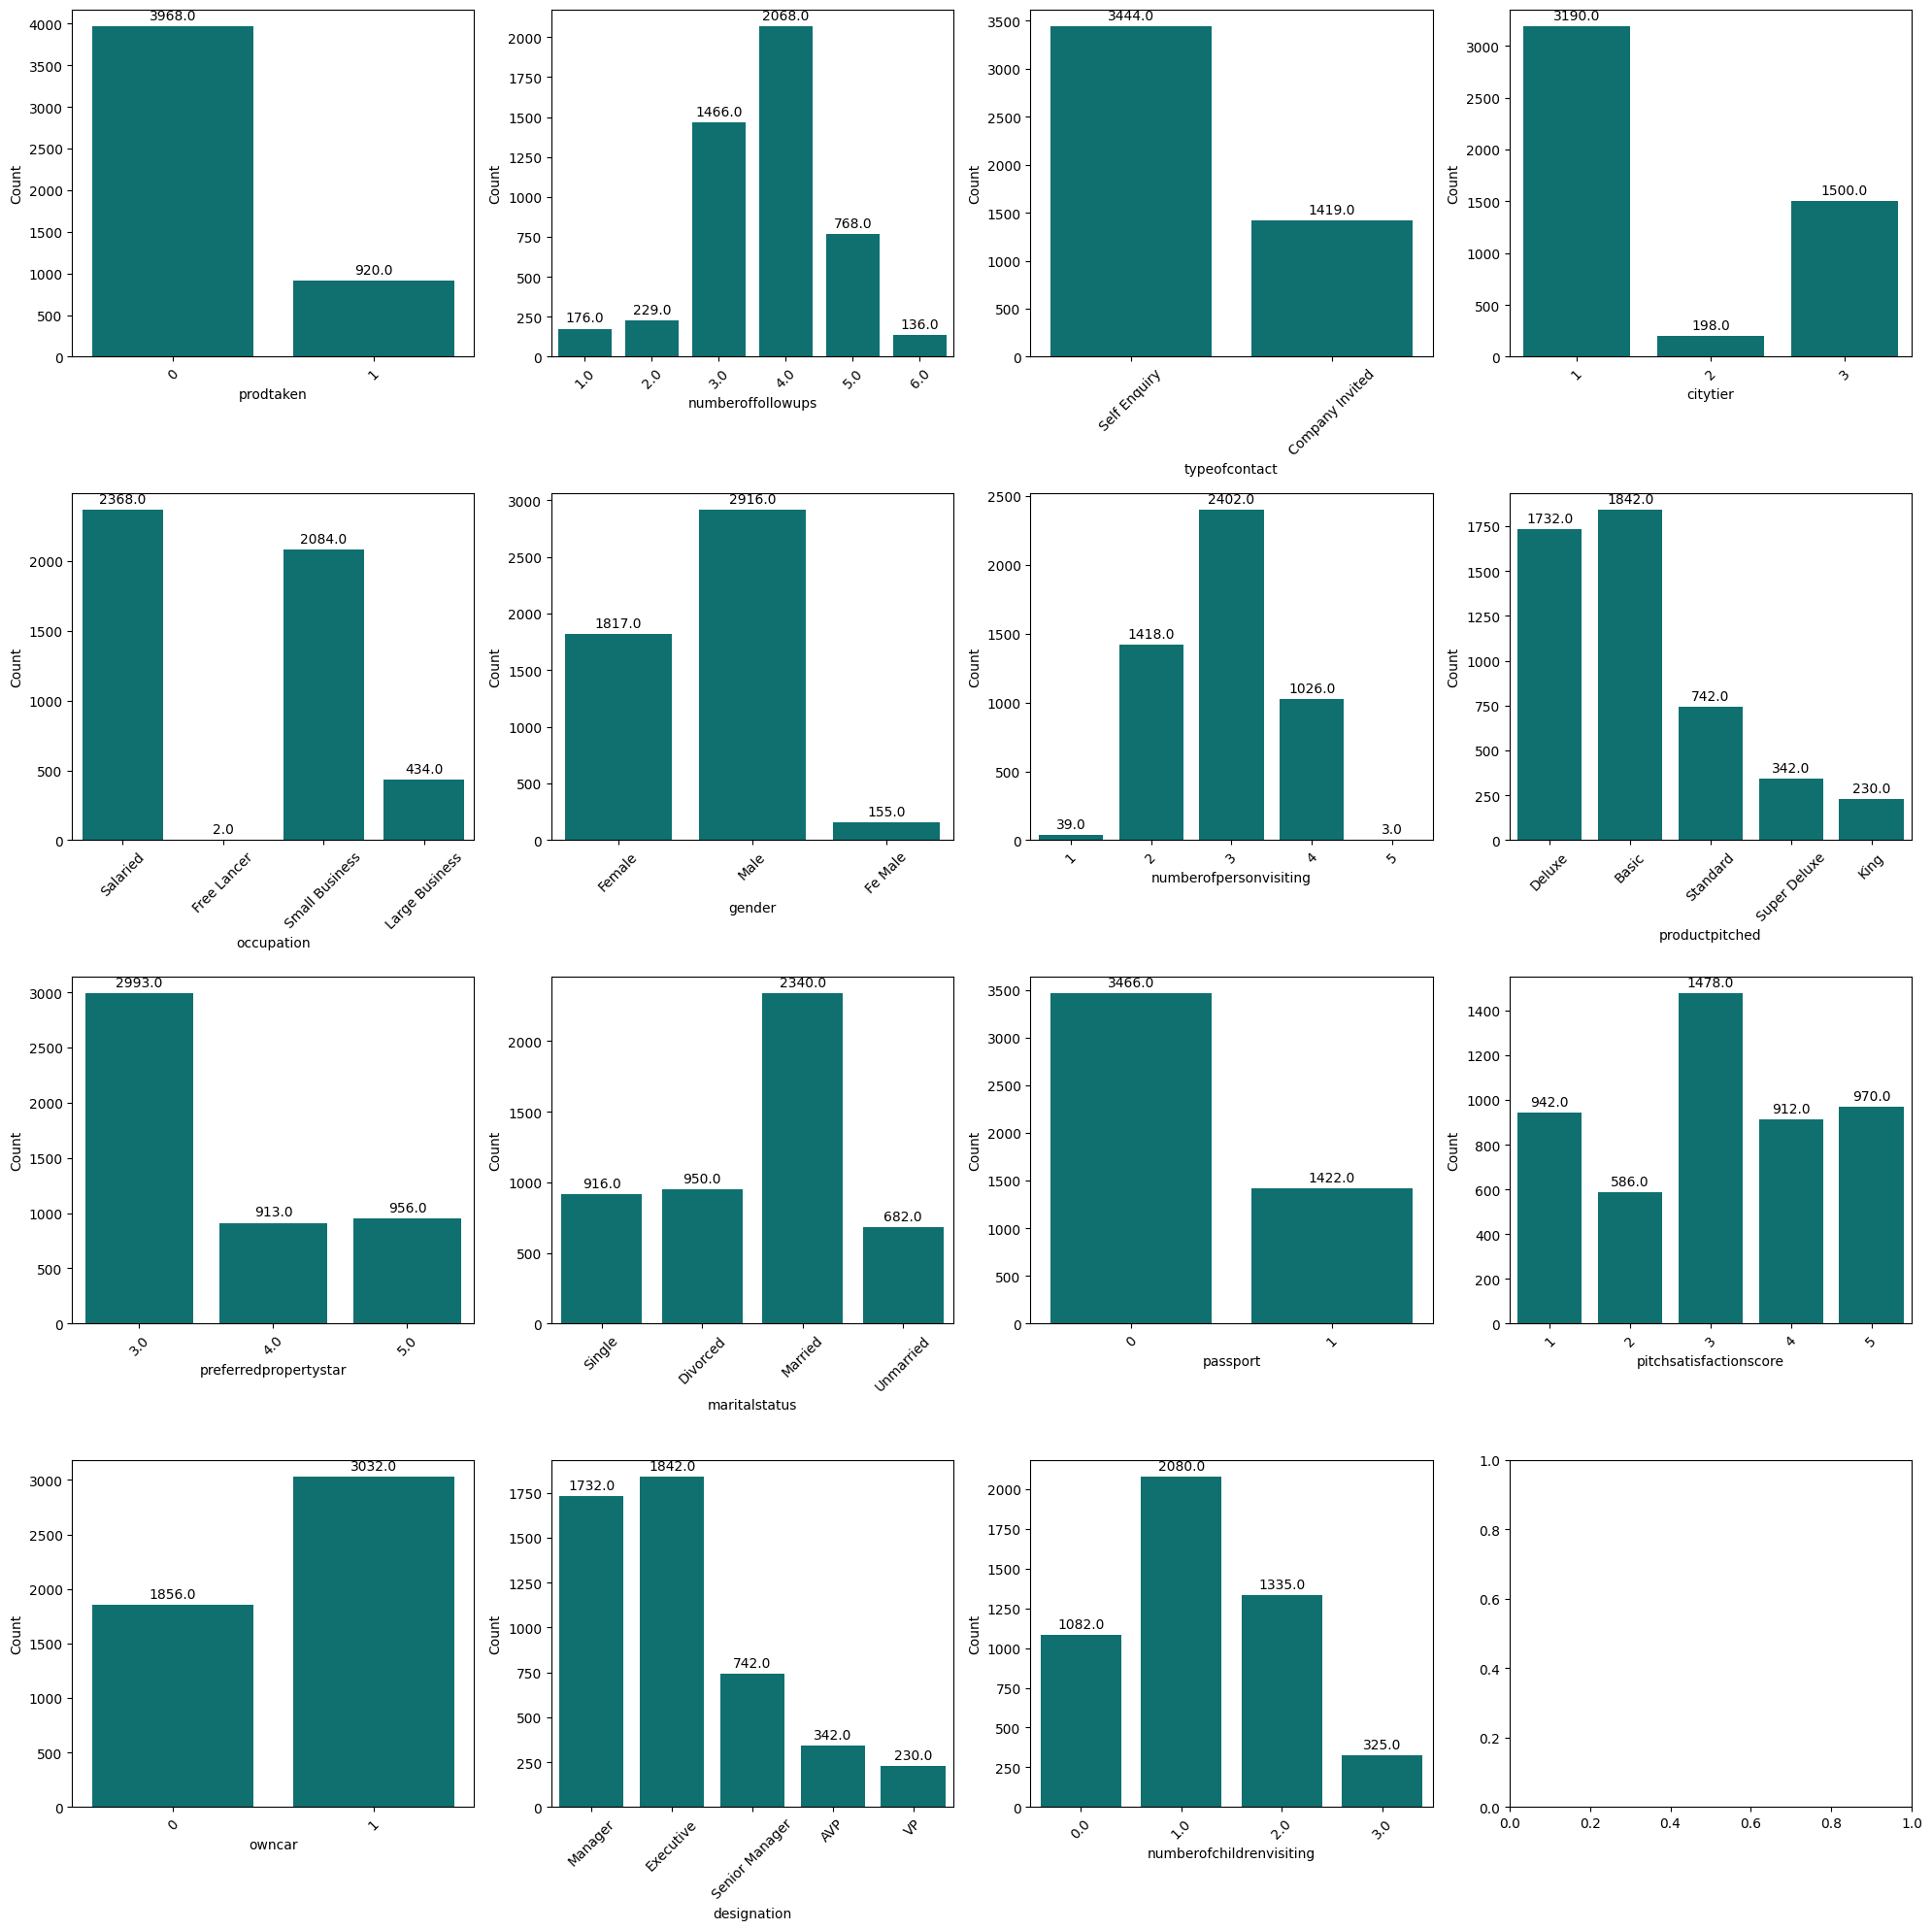

In [65]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(cols_categorical):
    sns.countplot(x=df[feature], ax=axes[i], color='Teal')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

    # Menambahkan anotasi jumlah data pada setiap batang
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

In [66]:
cols_categorical5 = ['prodtaken','numberofpersonvisiting','designation','productpitched','pitchsatisfactionscore']

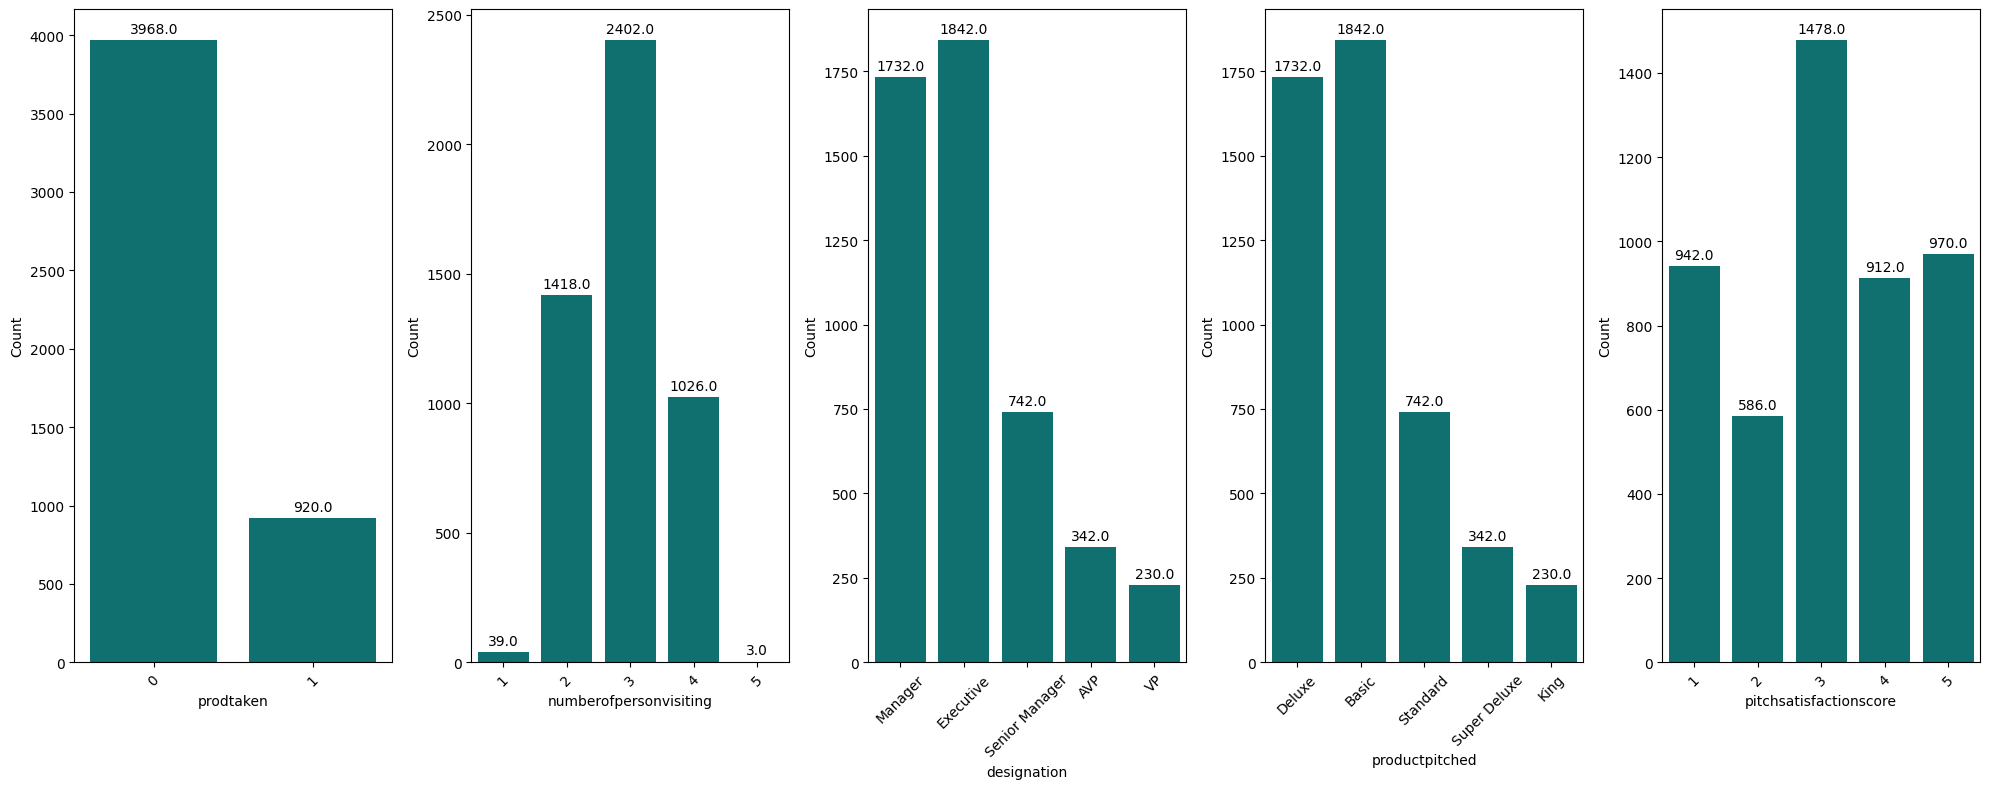

In [67]:
fig, axes = plt.subplots(1, 5, figsize=(20,8))
axes = axes.flatten()

for i, feature in enumerate(cols_categorical5):
    sns.countplot(x=df[feature], ax=axes[i], color='Teal')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

    # Menambahkan anotasi jumlah data pada setiap batang
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()


## 2.2 Distribution Outliers

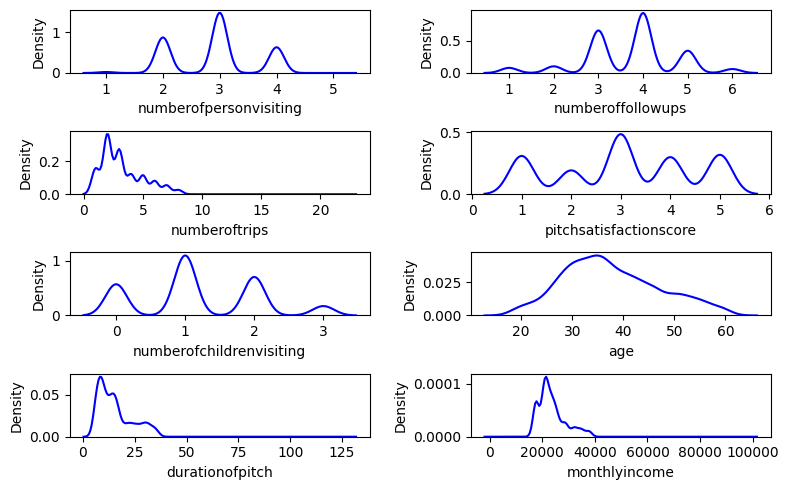

In [68]:
# Membuat subplots
fig, axes = plt.subplots(4, 2, figsize=(8, 5))  # Mengubah ukuran figure

# Plot setiap fitur pada subplot yang sesuai
for i, feature in enumerate(numericals):
    sns.kdeplot(x=df[feature], ax=axes[i//2, i%2], color='blue')
    axes[i//2, i%2].set_xlabel(feature)
    axes[i//2, i%2].set_ylabel('Density')

plt.tight_layout()
plt.show()

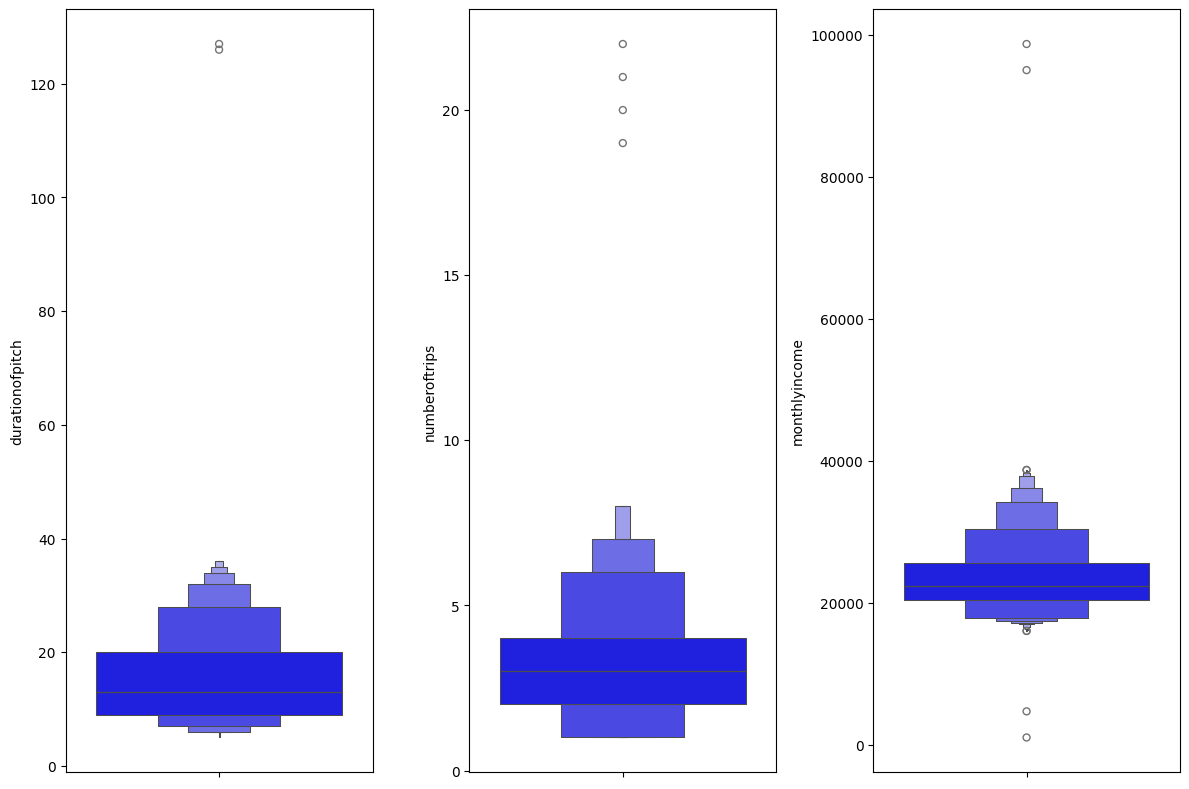

In [69]:
# box plot untuk kolom yang memiliki outliers

cols_with_outliers = ['durationofpitch','numberoftrips','monthlyincome']
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

for i, feature in enumerate(cols_with_outliers):
    sns.boxenplot(y=df[feature], ax=axes[i], color='blue')

plt.tight_layout()
plt.show()

## 2.3 Kesimpulan



1.   Terdapat 3 kolom yang memiliki outliers yaitu 'durationofpitch','numberoftrips','monthlyincome'
2.   Beberapa kolom yang ada dan memiliki outliers perlu dilakukan handling terlebih dahulu sebelum melakukan analisa lebih lanjut
3.   Kolom 'DurationOfPitch','NumberOfTrips','MonthlyIncome' memiliki distribusi condong ke kanan.
4.   Kolom Target yaitu 'ProdTaken' yang menandakan bahwa apakah produk diambil atau tidak didapatkan data banyaknya produk yang tidak diambil yaitu sebesar 3968 dan banyaknya produk yang diambil yaitu sebesar 920.






# 3. Multivariete Analysis

## 3.1. Bivariate Analysis

In [70]:
corr = cnum_col + dnum_col

In [71]:
# Menghitung korelasi disetiap feature numeric
df[corr].corr()

,age,durationofpitch,monthlyincome,numberofpersonvisiting,numberoffollowups,numberoftrips,pitchsatisfactionscore,numberofchildrenvisiting
age,1.000000,-0.012063,0.464869,0.011621,-0.002577,0.184905,0.018510,0.007370
durationofpitch,-0.012063,1.000000,-0.006252,0.065141,0.009434,0.009715,-0.002880,0.031408
monthlyincome,0.464869,-0.006252,1.000000,0.195134,0.176503,0.139105,0.030421,0.201643
numberofpersonvisiting,0.011621,0.065141,0.195134,1.000000,0.328569,0.195223,-0.019581,0.610621
numberoffollowups,-0.002577,0.009434,0.176503,0.328569,1.000000,0.139517,0.004054,0.286425
numberoftrips,0.184905,0.009715,0.139105,0.195223,0.139517,1.000000,-0.004378,0.168795
pitchsatisfactionscore,0.018510,-0.002880,0.030421,-0.019581,0.004054,-0.004378,1.000000,0.000878
numberofchildrenvisiting,0.007370,0.031408,0.201643,0.610621,0.286425,0.168795,0.000878,1.000000


## 3.2 Numerical vs Numerical Analysis

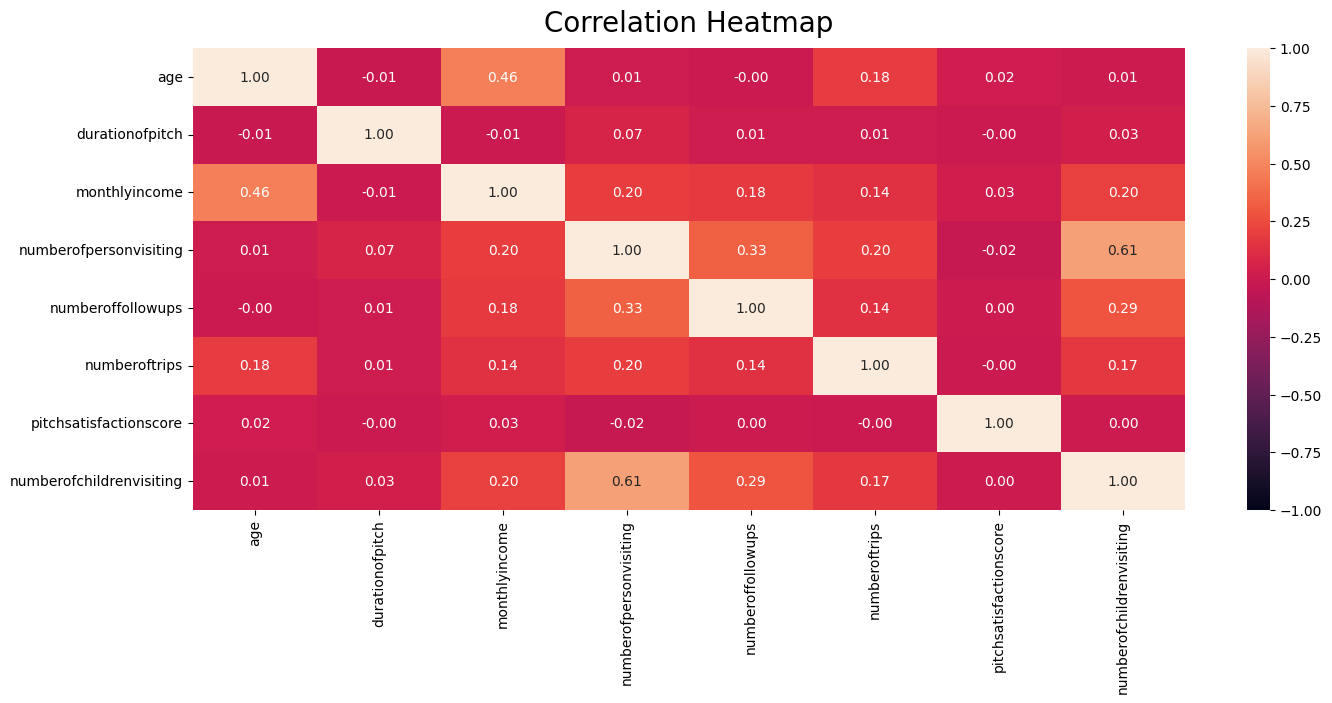

In [72]:
# Correlation Heatmap (Numeric)
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df[corr].corr(),
                      vmin=-1,
                      vmax=1,
                      fmt='.2f' ,
                      annot=True)

heatmap.set_title('Correlation Heatmap',
                  fontdict={'fontsize':20},
                  pad=12);

In [ ]:
sns.pairplot(pd.concat([df[corr], df[["prodtaken"]]], axis=1), hue="prodtaken")

plt.title("Numerical vs Numerical Feature Distribution of Correlation")
plt.show();

**Insight:**

Tidak ada korelasi yang kuat antara Fitur Numerik. Namun, terdapat korelasi sedang antara `NumberOfPersonVisiting` dengan `NumberOfChildrenVisiting`. dan korelasi kecil antara `Age` and `MonthlyIncome`

## 3.3 Categorical vs Categorical Features

In [ ]:
cats = [#'customerid',
        'typeofcontact',
        'preferredpropertystar',
        'occupation',
        'gender',
        'productpitched',
        'maritalstatus',
        'designation',
        #'prodtaken',
        'passport',
        'owncar',
        'citytier']

In [ ]:
# Categorical vs Categorical
cat_comb = []
for cat1 in cats:
    for cat2 in cats:
        if cat1 != cat2 and sorted([cat1, cat2]) not in cat_comb:
            cat_comb.append(sorted([cat1, cat2]))

num_combinations = len(cat_comb)
num_cols = 2
num_rows = (num_combinations + num_cols - 1) // num_cols  # Pembulatan ke atas

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))  # Adjust figsize as needed
axes = axes.flatten()


for i, comb in enumerate(cat_comb):
    sns.countplot(data=df, x=comb[0], hue=comb[1], ax=axes[i])
    axes[i].set_title(f'{comb[0]} vs {comb[1]}')

for j in range(len(cat_comb), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight:**

1. `ProductPitched` 100% berkorelasi dengan `Designation`. KMaka kita akan menghapus feature `ProductPitched`.
2. Komposisi Salaried dari fitur `occupation` di `citytier` 1, lebih banyak dibandingkan dengan yang lain.

## 3.4 Categorical vs Numerical Features

### 3.4.1 Categorical vs Continous Numerical Features

In [ ]:
for cat in cats:
    fig, ax = plt.subplots(1, len(cnum_col), figsize=(20,6))
    for i, num in enumerate(cnum_col):
        sns.stripplot(df, x=cat, y=num, hue="prodtaken",
                      ax=ax[i])
        ax[i].set_title(f"{num} over {cat}")
        fig.show();

**Insight**

executive dan manager yang memiliki pendapatan bulanan lebih tinggi cenderung mengambil produk ini

### 3.4.2 Categorical vs Diskrit Numerical Features

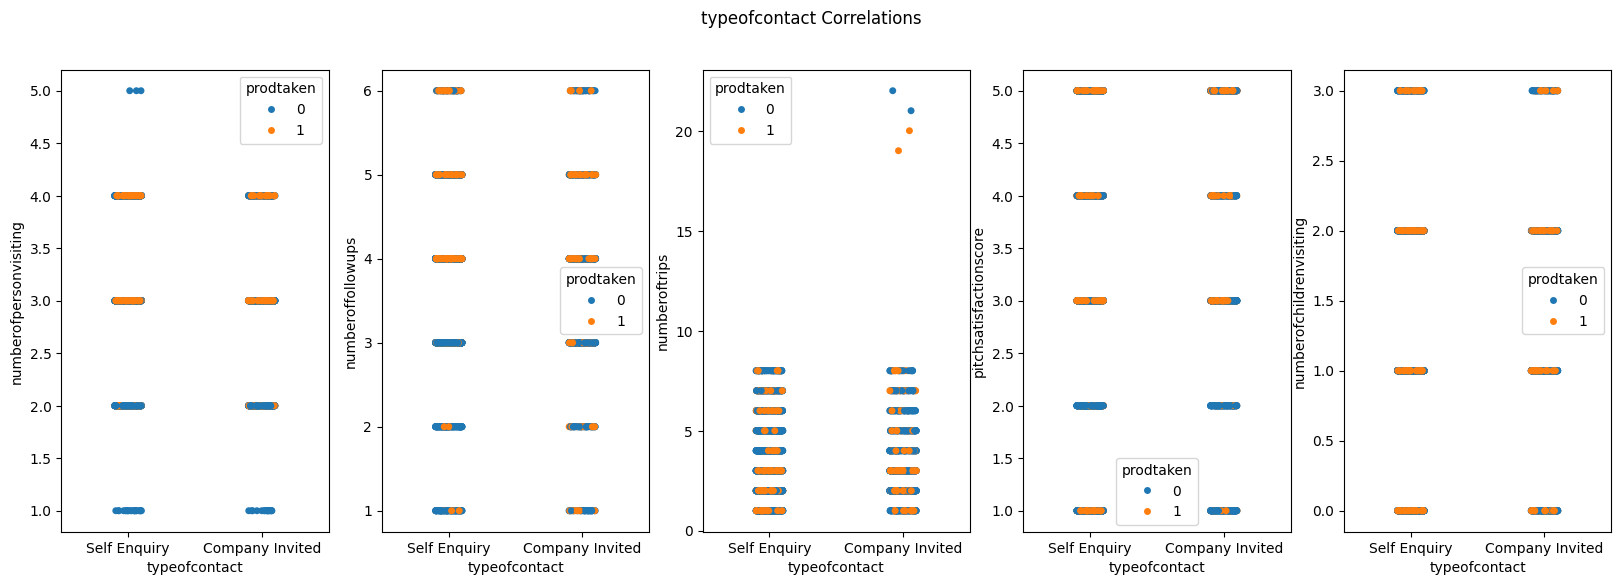

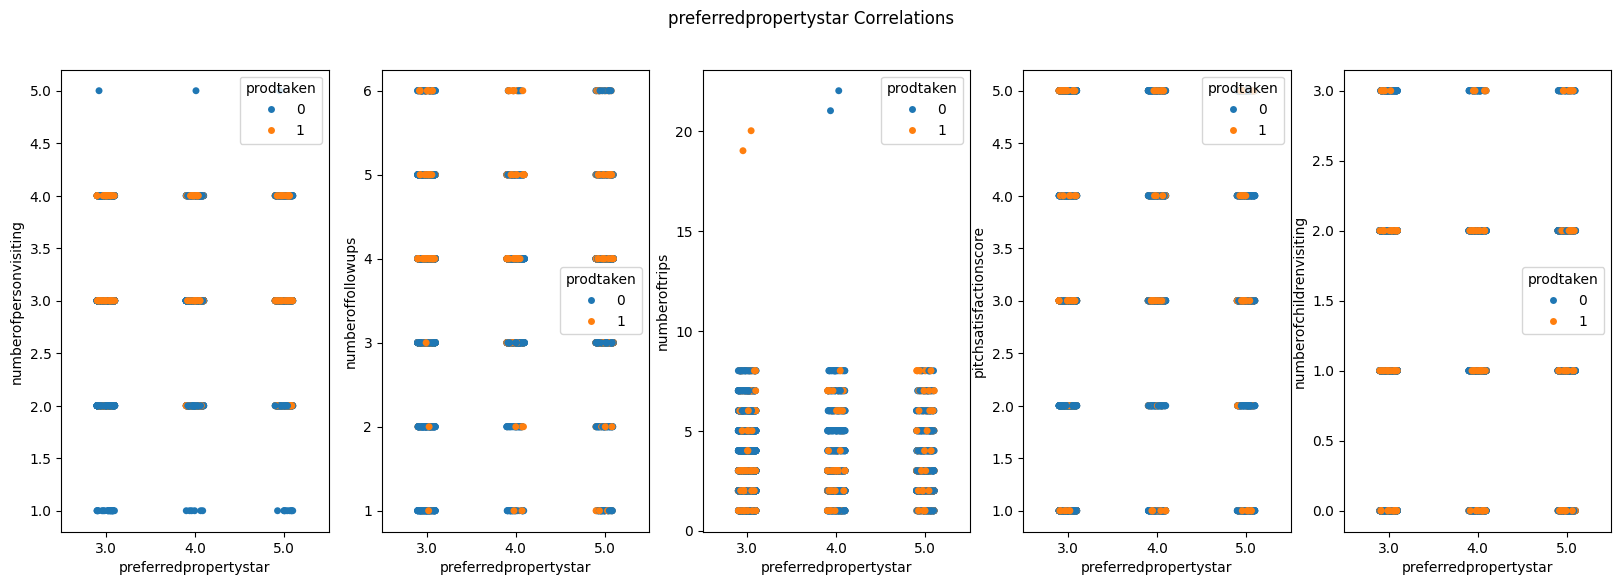

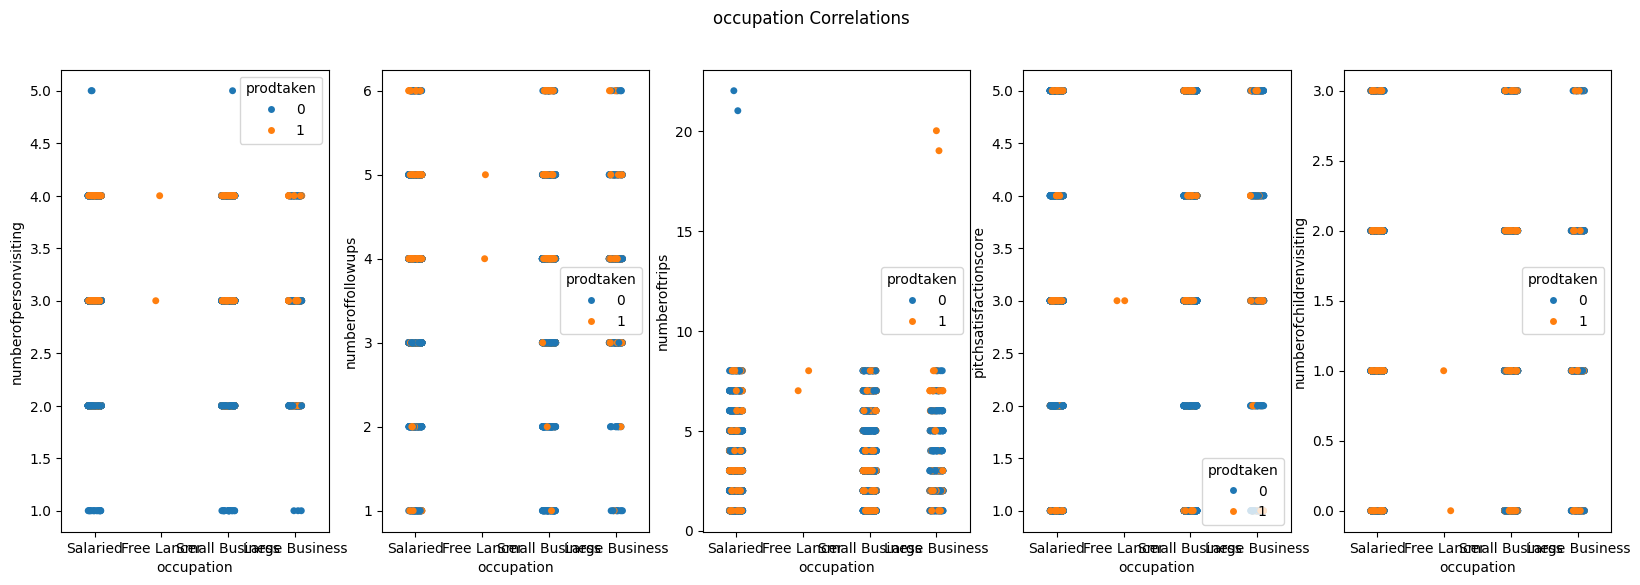

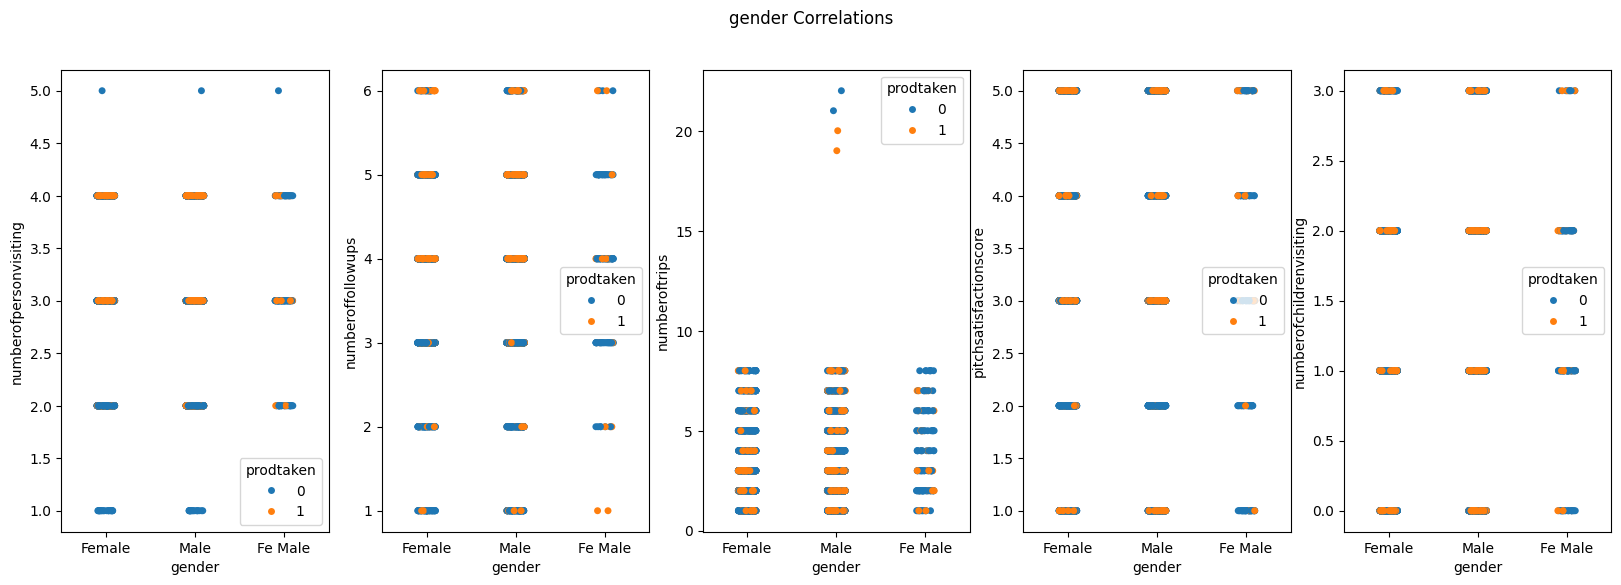

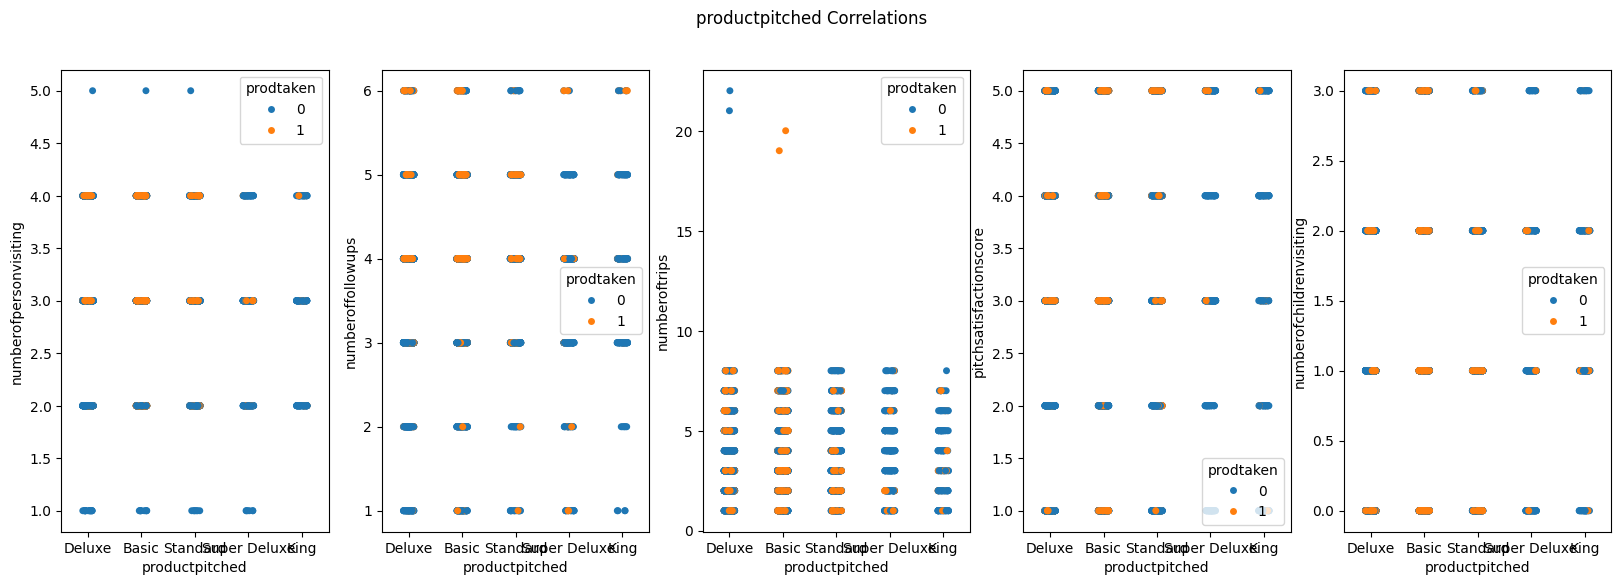

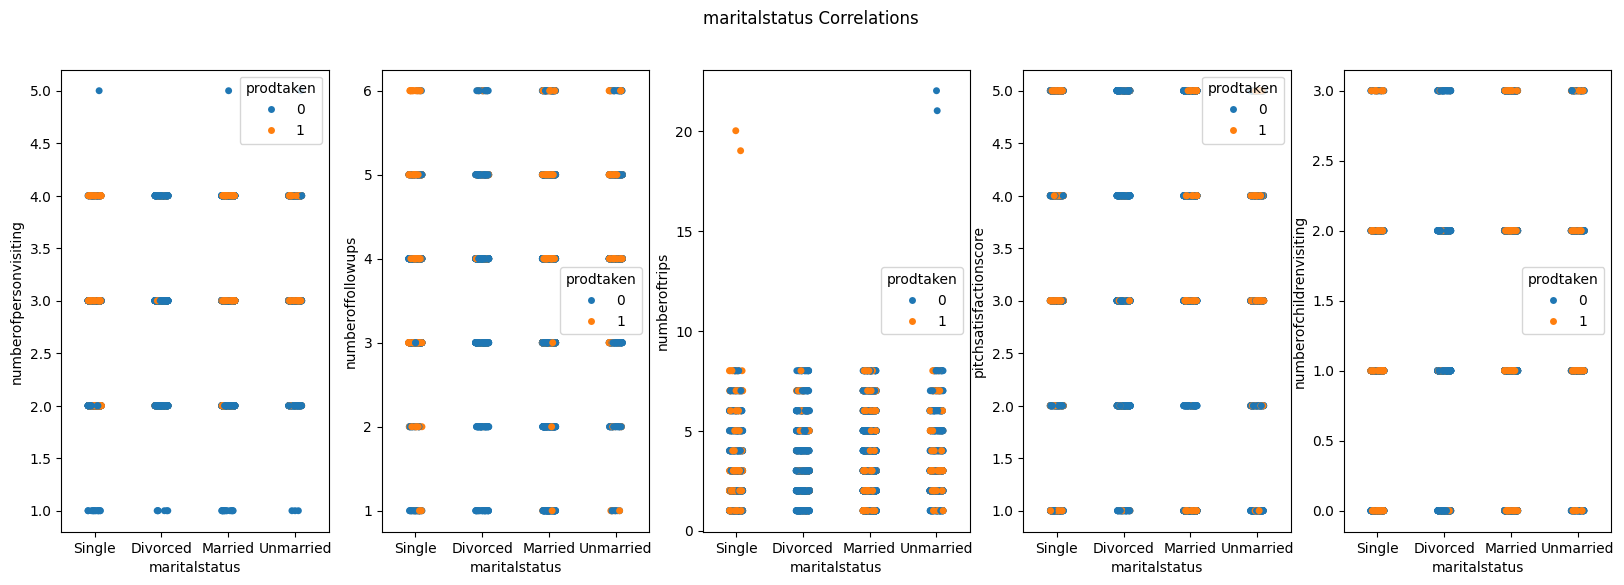

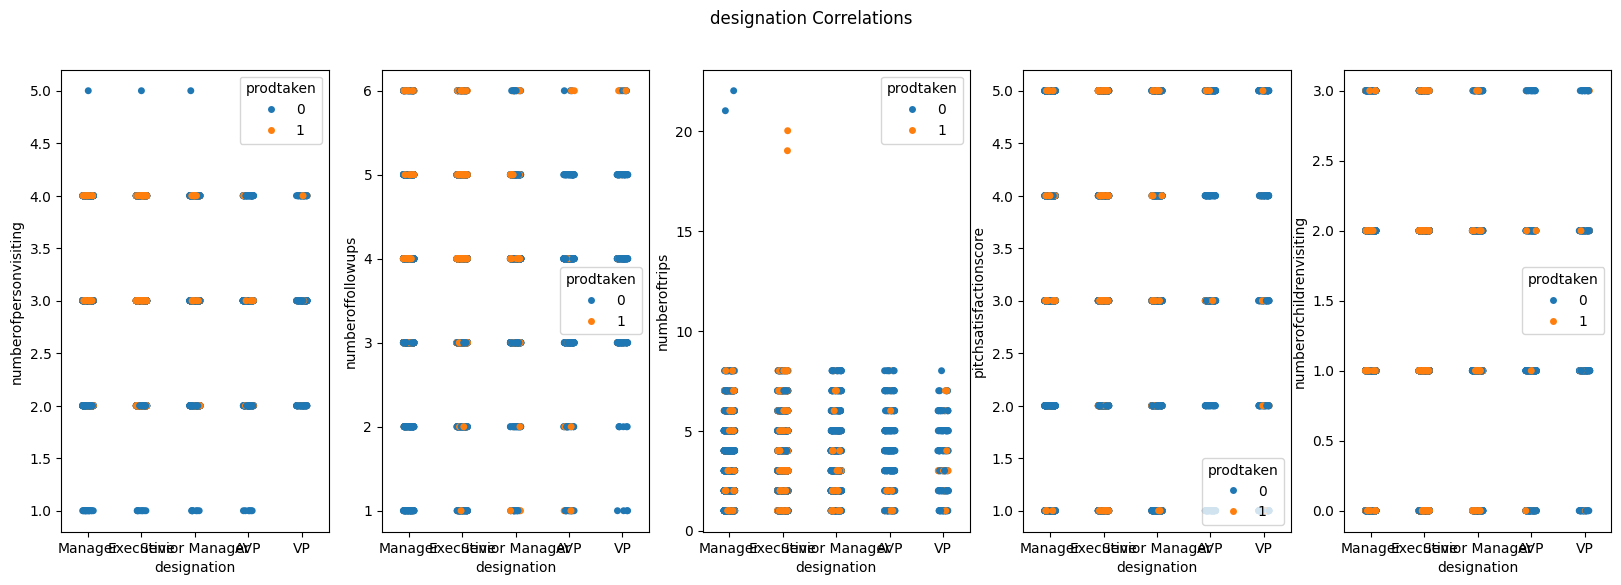

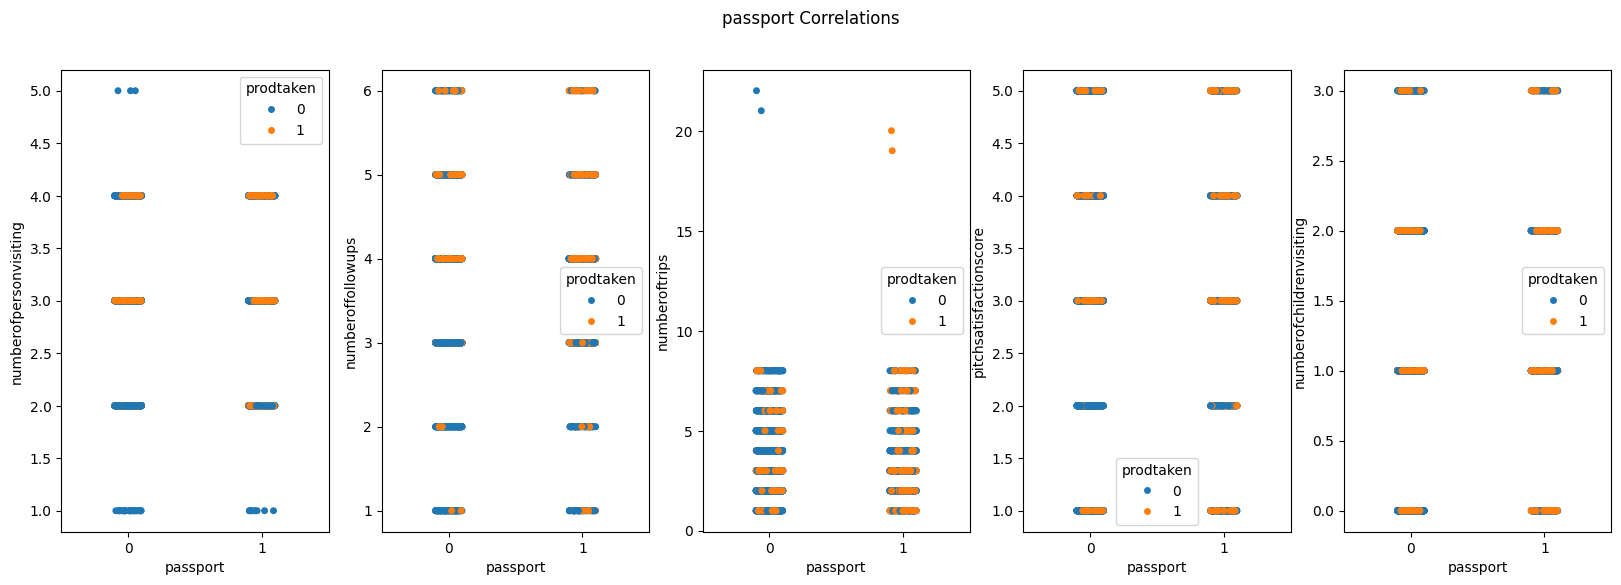

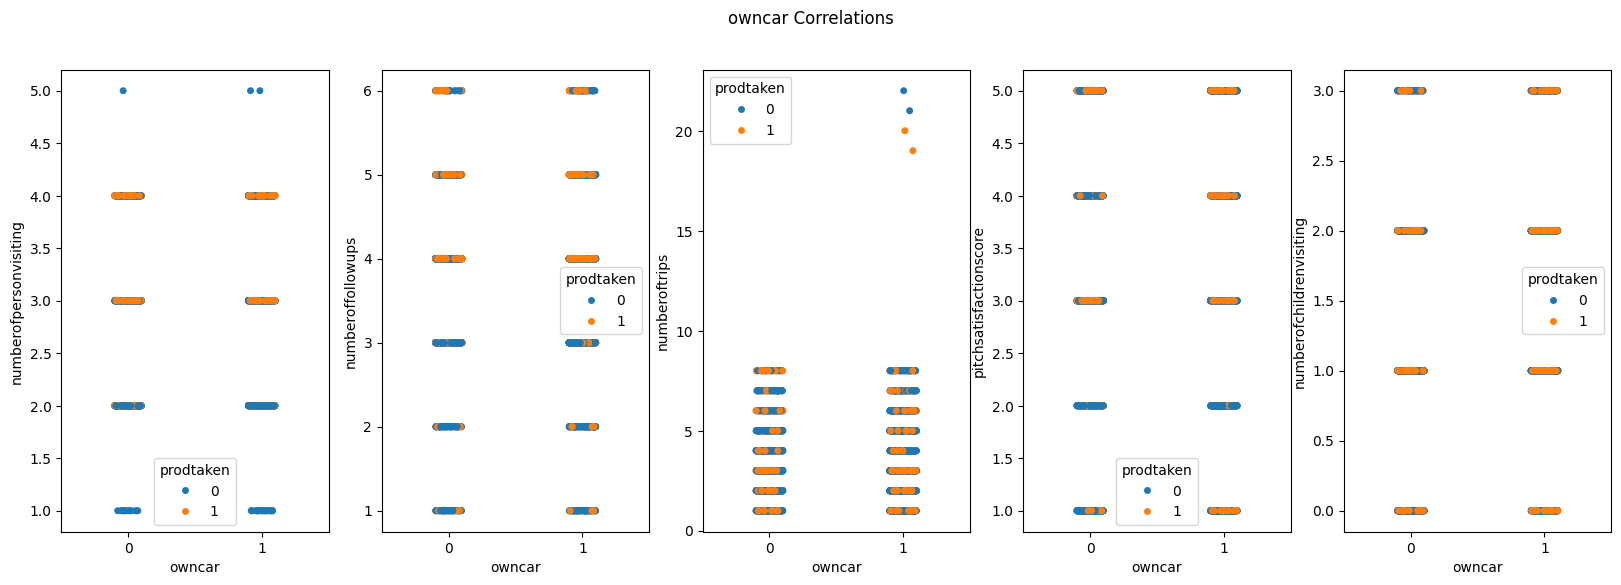

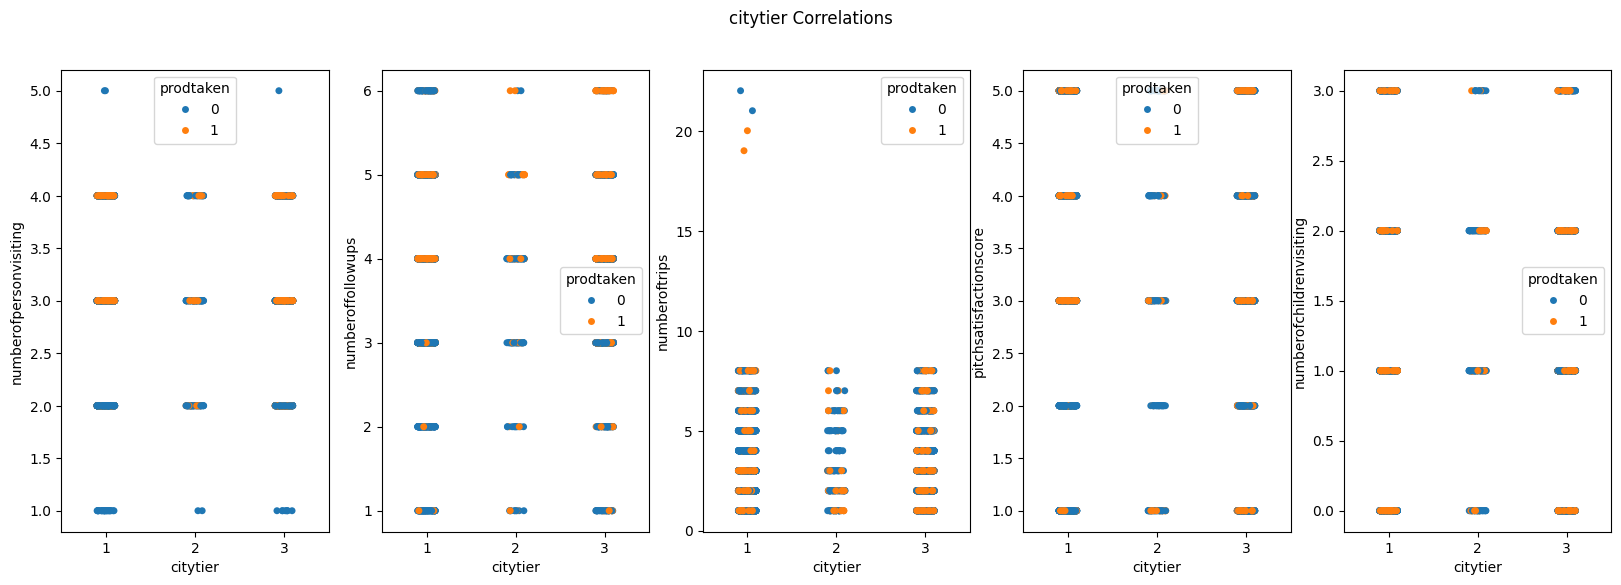

In [ ]:
for cat in cats:
    fig, ax = plt.subplots(1, len(dnum_col), figsize=(20,6))
    for i, num in enumerate(dnum_col):
        sns.stripplot(df, x=cat, y=num, hue="prodtaken",
                      ax=ax[i])
        plt.suptitle(f"{cat} Correlations")
        fig.show();

**Insight**:

1. nilai Devorced pada fitur `maritalstauts` cenderung tidak menolak produk.
2. Satu orang dapat dengan mudah mengambil produk meskipun dengan tindak lanjut yang rendah

# 4. Business Insight

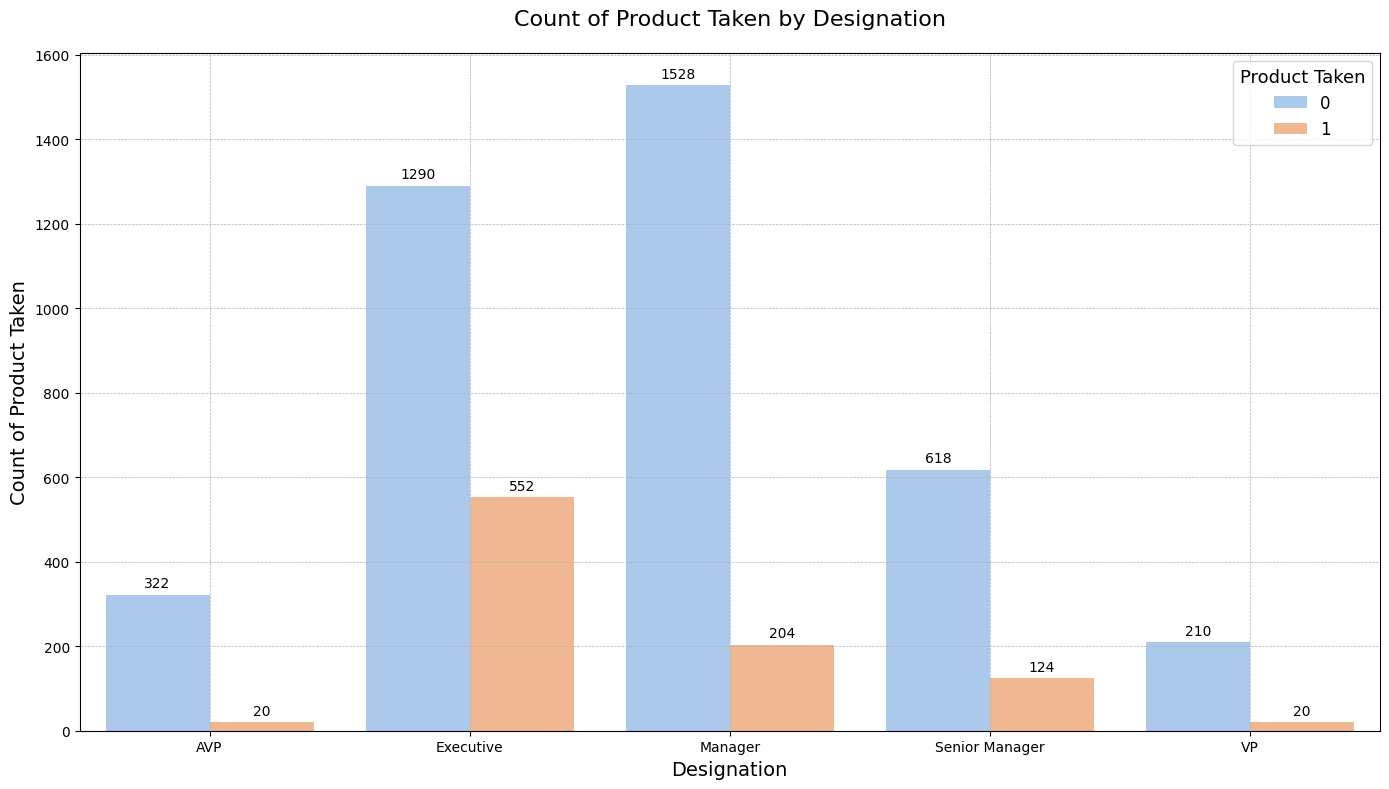

In [ ]:
designation_prodtaken_counts = df.groupby(['designation', 'prodtaken']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))

ax = sns.barplot(data=designation_prodtaken_counts, x='designation', y='count', hue='prodtaken', palette="pastel")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.title('Count of Product Taken by Designation', fontsize=16, pad=20)
plt.xlabel('Designation', fontsize=14)
plt.ylabel('Count of Product Taken', fontsize=14)
plt.legend(title='Product Taken', title_fontsize='13', fontsize='12', loc='upper right')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

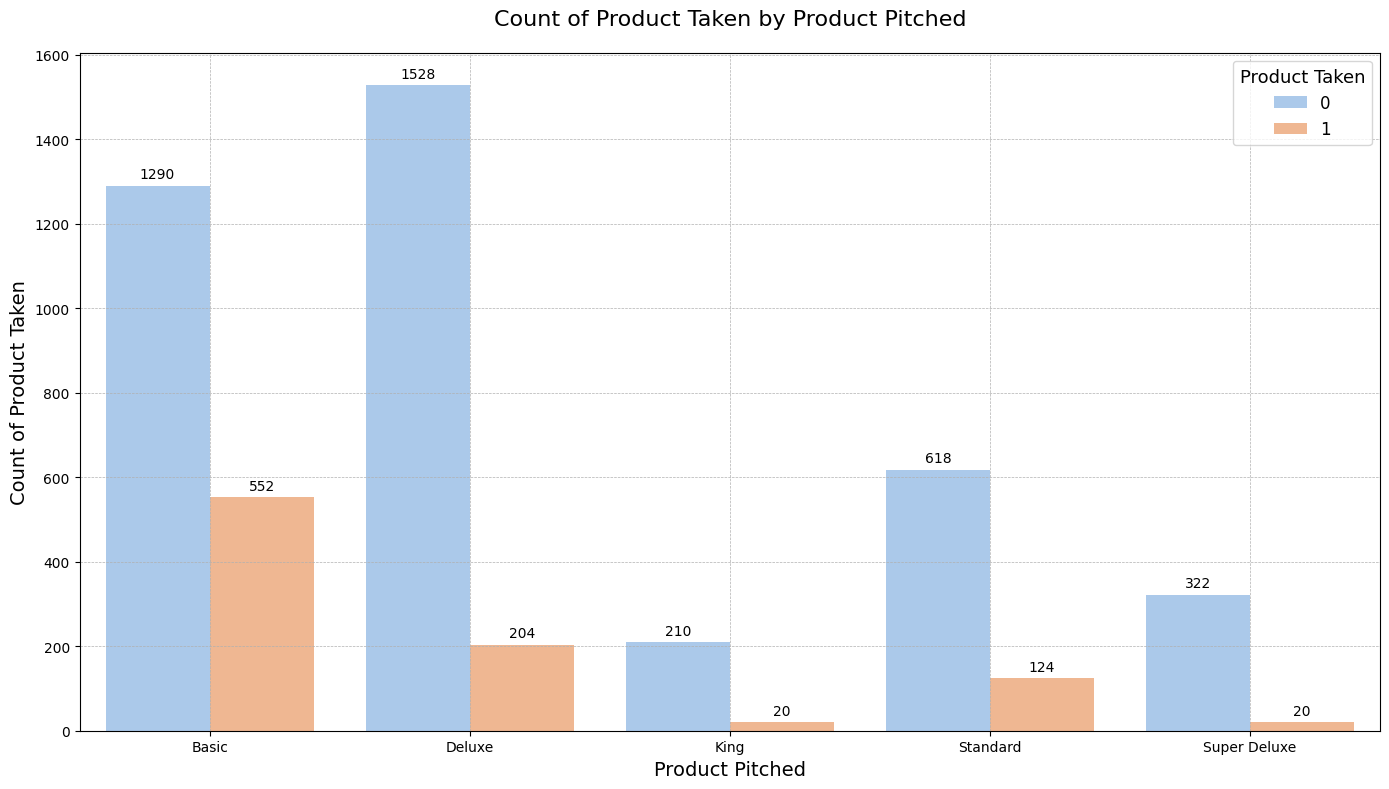

In [ ]:
product_pitched_product_taken_counts = df.groupby(['productpitched', 'prodtaken']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))

ax = sns.barplot(data=product_pitched_product_taken_counts, x='productpitched', y='count', hue='prodtaken', palette="pastel")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.title('Count of Product Taken by Product Pitched', fontsize=16, pad=20)
plt.xlabel('Product Pitched', fontsize=14)
plt.ylabel('Count of Product Taken', fontsize=14)
plt.legend(title='Product Taken', title_fontsize='13', fontsize='12', loc='upper right')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

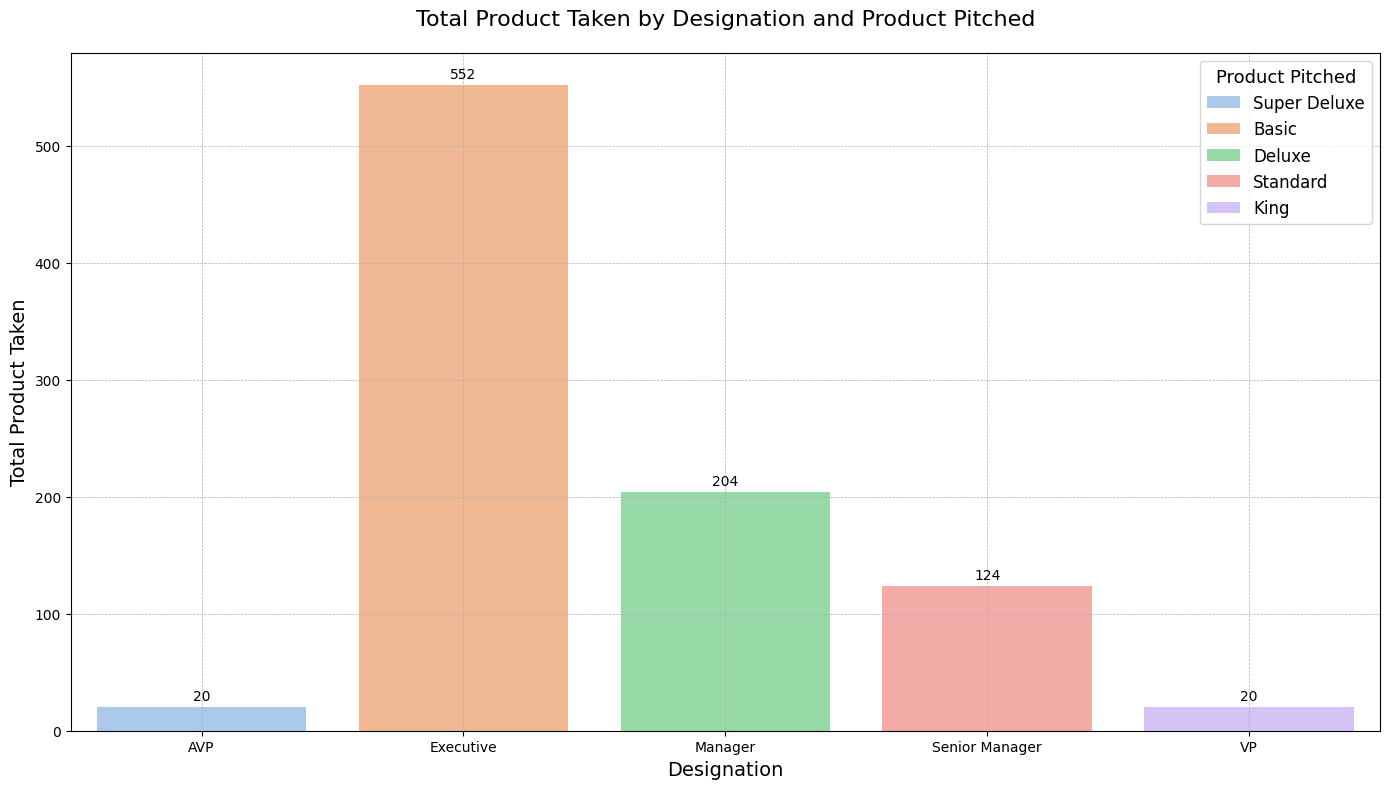

In [ ]:
designation_product_pitched_prodtaken_counts = df.groupby(['designation', 'productpitched'])['prodtaken'].sum().reset_index()

plt.figure(figsize=(14, 8))

ax = sns.barplot(data=designation_product_pitched_prodtaken_counts, x='designation', y='prodtaken', hue='productpitched', palette="pastel")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.title('Total Product Taken by Designation and Product Pitched', fontsize=16, pad=20)
plt.xlabel('Designation', fontsize=14)
plt.ylabel('Total Product Taken', fontsize=14)
plt.legend(title='Product Pitched', title_fontsize='13', fontsize='12', loc='upper right')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

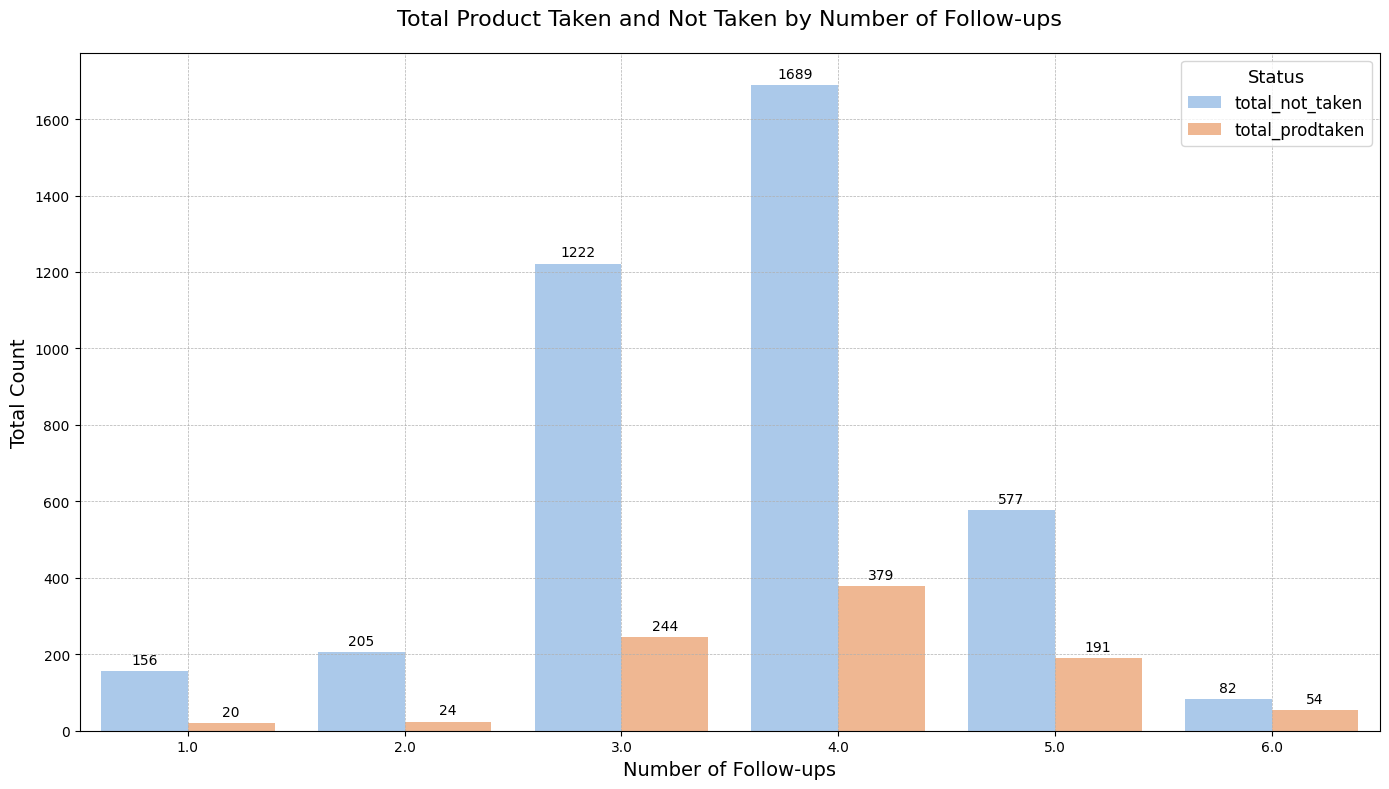

In [ ]:
total_prodtaken_by_followups = df.groupby('numberoffollowups')['prodtaken'].sum().reset_index(name='total_prodtaken')
total_not_taken_by_followups = df.groupby('numberoffollowups')['prodtaken'].apply(lambda x: (x == 0).sum()).reset_index(name='total_not_taken')

total_followups_counts = pd.merge(total_prodtaken_by_followups, total_not_taken_by_followups, on='numberoffollowups')
total_followups_counts_melted = total_followups_counts.melt(id_vars='numberoffollowups', var_name='status', value_name='count')

status_order = ['total_not_taken', 'total_prodtaken']
total_followups_counts_melted['status'] = pd.Categorical(total_followups_counts_melted['status'], categories=status_order, ordered=True)

plt.figure(figsize=(14, 8))

ax = sns.barplot(data=total_followups_counts_melted, x='numberoffollowups', y='count', hue='status', palette="pastel")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.title('Total Product Taken and Not Taken by Number of Follow-ups', fontsize=16, pad=20)
plt.xlabel('Number of Follow-ups', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.legend(title='Status', title_fontsize='13', fontsize='12', loc='upper right')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

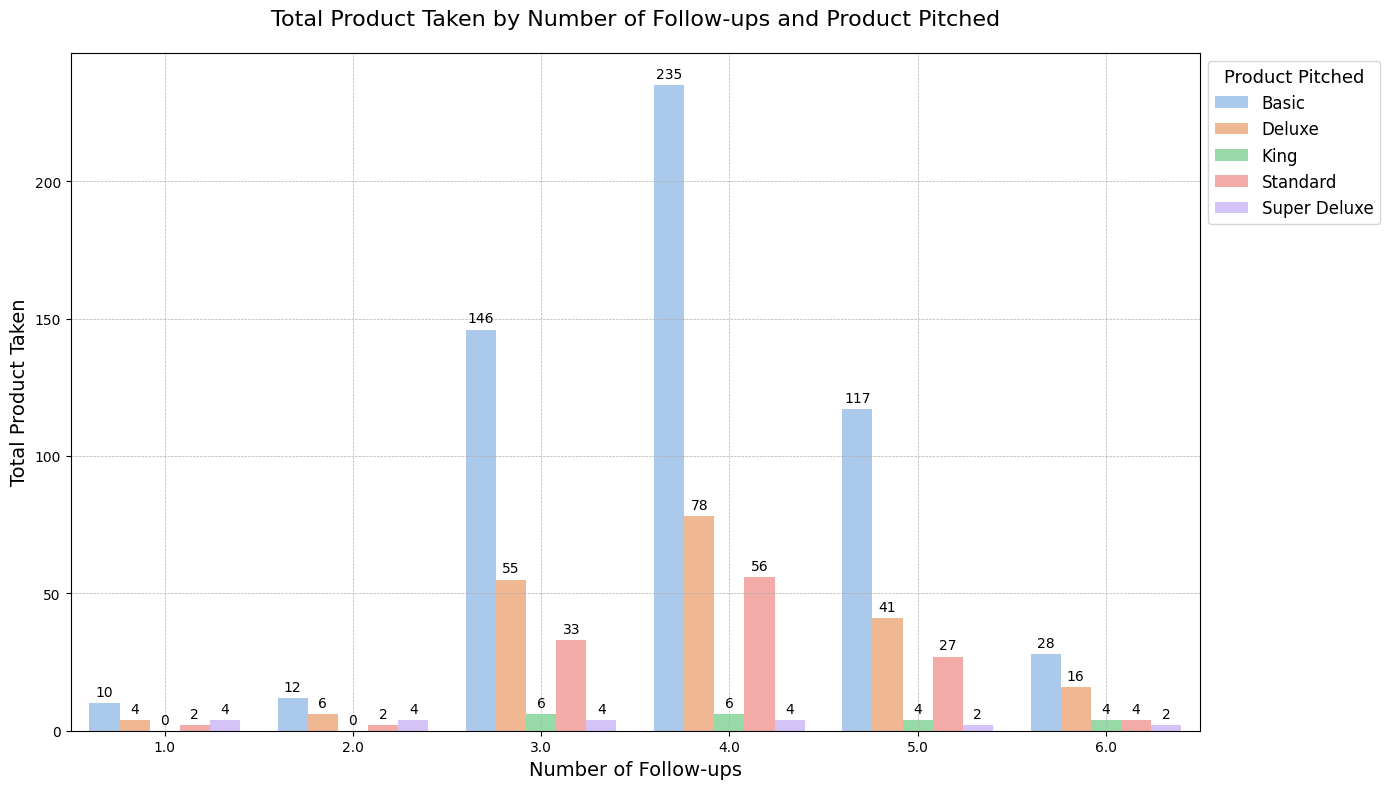

In [ ]:
followups_product_pitched_prodtaken_counts = df.groupby(['numberoffollowups', 'productpitched'])['prodtaken'].sum().reset_index()
plt.figure(figsize=(14, 8))

ax = sns.barplot(data=followups_product_pitched_prodtaken_counts, x='numberoffollowups', y='prodtaken', hue='productpitched', palette="pastel")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.title('Total Product Taken by Number of Follow-ups and Product Pitched', fontsize=16, pad=20)
plt.xlabel('Number of Follow-ups', fontsize=14)
plt.ylabel('Total Product Taken', fontsize=14)
plt.legend(title='Product Pitched', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

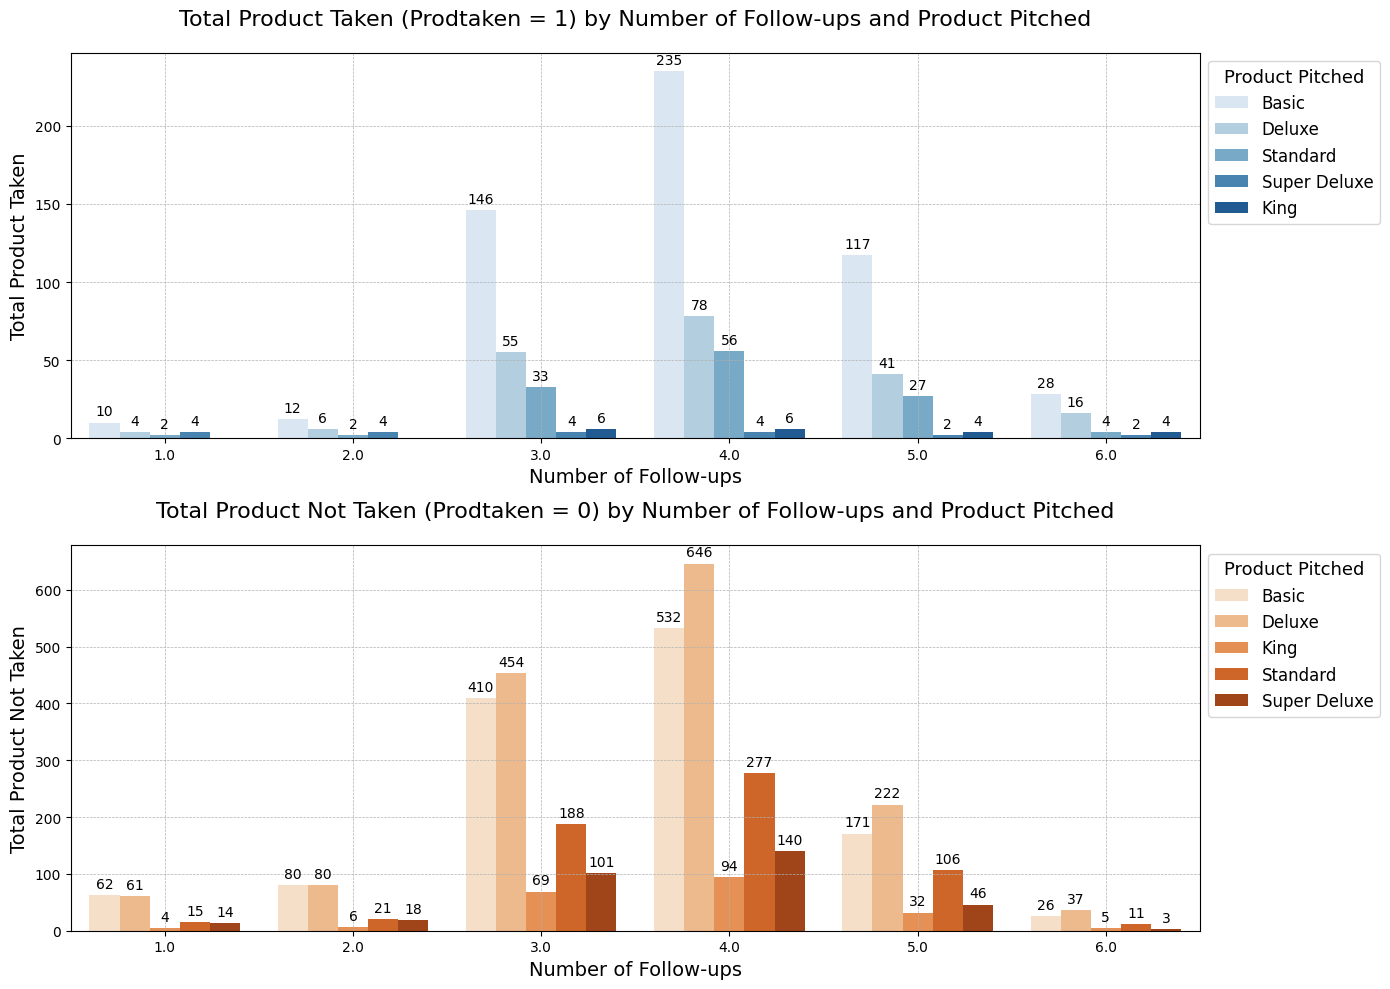

In [ ]:
df_taken = df[df['prodtaken'] == 1]
df_not_taken = df[df['prodtaken'] == 0]

followups_product_pitched_taken_counts = df_taken.groupby(['numberoffollowups', 'productpitched'])['prodtaken'].count().reset_index()
followups_product_pitched_not_taken_counts = df_not_taken.groupby(['numberoffollowups', 'productpitched'])['prodtaken'].count().reset_index()

plt.figure(figsize=(14, 10))
ax1 = plt.subplot(2, 1, 1)
sns.barplot(data=followups_product_pitched_taken_counts, x='numberoffollowups', y='prodtaken', hue='productpitched', palette="Blues", ax=ax1)
ax1.set_title('Total Product Taken (Prodtaken = 1) by Number of Follow-ups and Product Pitched', fontsize=16, pad=20)
ax1.set_xlabel('Number of Follow-ups', fontsize=14)
ax1.set_ylabel('Total Product Taken', fontsize=14)
ax1.legend(title='Product Pitched', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', padding=3)

ax2 = plt.subplot(2, 1, 2)
sns.barplot(data=followups_product_pitched_not_taken_counts, x='numberoffollowups', y='prodtaken', hue='productpitched', palette="Oranges", ax=ax2)
ax2.set_title('Total Product Not Taken (Prodtaken = 0) by Number of Follow-ups and Product Pitched', fontsize=16, pad=20)
ax2.set_xlabel('Number of Follow-ups', fontsize=14)
ax2.set_ylabel('Total Product Not Taken', fontsize=14)
ax2.legend(title='Product Pitched', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

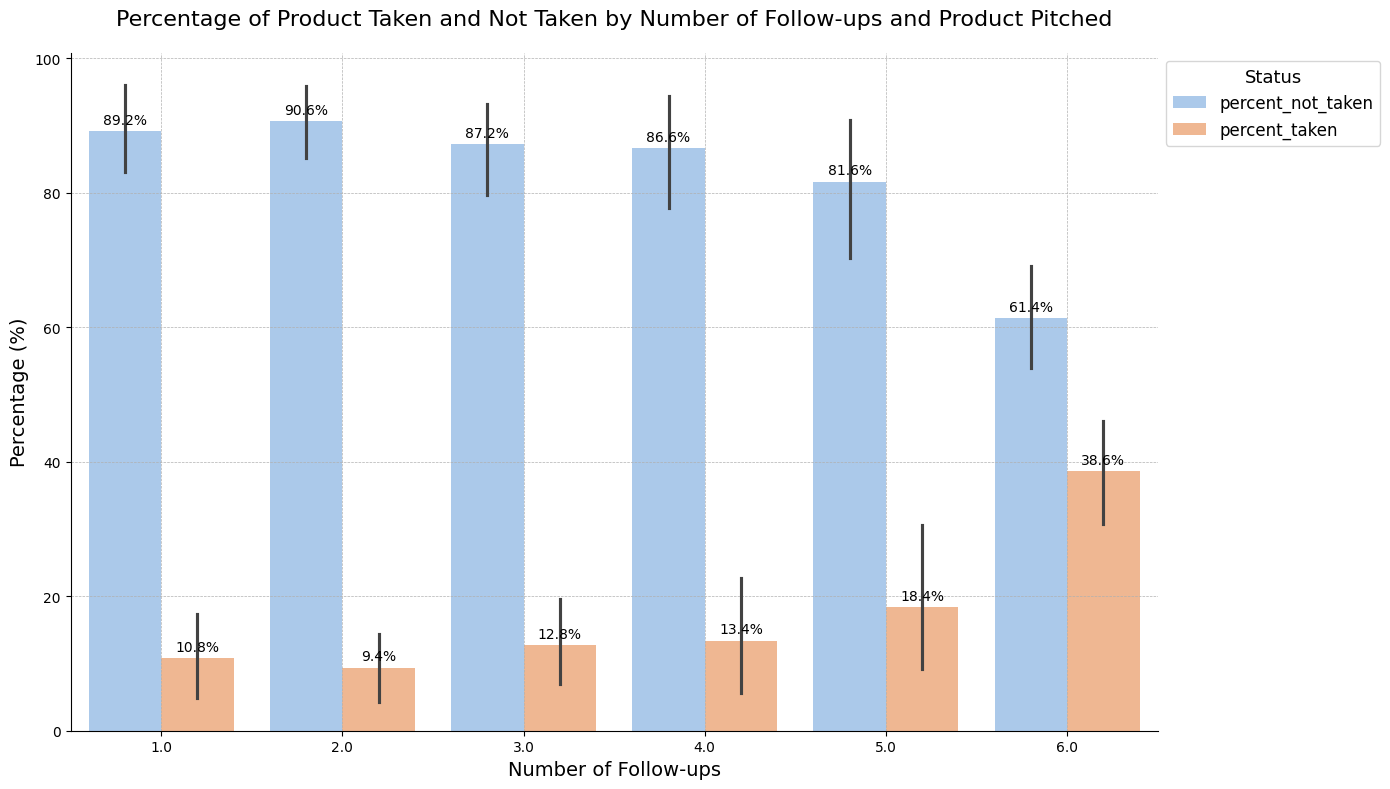

In [ ]:
total_counts = df.groupby(['numberoffollowups', 'productpitched'])['prodtaken'].count().reset_index(name='total_count')
total_taken = df.groupby(['numberoffollowups', 'productpitched'])['prodtaken'].sum().reset_index(name='total_taken')

merged_data = pd.merge(total_counts, total_taken, on=['numberoffollowups', 'productpitched'])
merged_data['total_not_taken'] = merged_data['total_count'] - merged_data['total_taken']
merged_data['percent_taken'] = (merged_data['total_taken'] / merged_data['total_count']) * 100
merged_data['percent_not_taken'] = (merged_data['total_not_taken'] / merged_data['total_count']) * 100

percentages_melted = merged_data.melt(id_vars=['numberoffollowups', 'productpitched'],
                                      value_vars=['percent_not_taken', 'percent_taken'],
                                      var_name='status',
                                      value_name='percentage')

plt.figure(figsize=(14, 8))

ax = sns.barplot(data=percentages_melted, x='numberoffollowups', y='percentage', hue='status', palette="pastel")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.title('Percentage of Product Taken and Not Taken by Number of Follow-ups and Product Pitched', fontsize=16, pad=20)
plt.xlabel('Number of Follow-ups', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

plt.legend(title='Status', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

sns.despine()

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()